<a href="https://colab.research.google.com/github/stuartketcham/DA310---Multiple-Linear-Regression---Group-Project/blob/main/Multiple_Linear_Regression_Group_Project_car_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
from sklearn.model_selection import cross_val_score
import numpy as np

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Read this csv file from GitHub into Jupyter Notebook.
dataset = pd.read_csv(r"https://raw.githubusercontent.com/stuartketcham/DA310---Multiple-Linear-Regression---Group-Project/main/CarPrice_Assignment.csv")

In [ ]:
#Make a copy and populate with training data
datasettraining = dataset.copy()
datasettest = dataset.copy()

#Take a random sample of 75% of the data for training (and put them into order and renumber to eliminate missing index values)
datasettraining = datasettraining.sample(frac = .75).sort_index().reset_index(drop=True)

#Get remaining 25% of data rows from dataset (remove all rows from dataset that aren't already in datasettraining)
datasettest = (pd.merge(dataset, datasettraining, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)).sort_index().reset_index(drop=True)

In [ ]:
#Check training data head
datasettraining.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
2,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
3,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
4,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.0


In [ ]:
#Summary of all fields
datasettraining.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,98.961039,0.857143,98.742208,174.129221,65.883766,53.721429,2551.915584,126.792208,3.331104,3.256461,9.861818,104.727273,5124.025974,25.285714,30.766234,13220.108227
std,57.575058,1.223028,6.257636,12.885174,2.242445,2.467328,534.705526,41.529055,0.281733,0.311721,3.587418,39.380874,472.243318,6.578549,6.874973,8274.444300
min,1.000000,-2.000000,86.600000,141.100000,60.300000,48.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,14.000000,16.000000,5118.000000
25%,51.250000,0.000000,94.500000,166.425000,64.000000,52.000000,2122.000000,97.000000,3.130000,3.112500,8.500000,70.000000,4800.000000,19.250000,25.000000,7525.000000
50%,95.500000,1.000000,96.750000,173.200000,65.400000,54.100000,2412.000000,120.000000,3.320000,3.270000,9.000000,97.000000,5200.000000,24.000000,30.000000,9974.000000
75%,145.750000,2.000000,102.100000,183.000000,66.500000,55.500000,2931.500000,144.000000,3.617500,3.410000,9.400000,116.000000,5500.000000,30.750000,36.750000,16547.250000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,308.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
#Summary of all fields
datasettest.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,115.196078,0.764706,98.800000,173.807843,65.980392,53.735294,2566.588235,127.254902,3.325686,3.252255,10.990196,102.274510,5128.431373,25.019608,30.705882,13447.627451
std,63.345724,1.320428,5.303018,10.624855,1.838806,2.394228,480.698000,42.397567,0.237464,0.322312,4.900419,40.371316,495.807917,6.491503,6.989404,7130.627706
min,2.000000,-2.000000,86.600000,144.600000,63.600000,47.800000,1819.000000,70.000000,2.910000,2.190000,7.000000,52.000000,4150.000000,13.000000,17.000000,5348.000000
25%,59.000000,0.000000,95.700000,166.900000,64.400000,52.250000,2228.500000,98.000000,3.190000,3.070000,8.700000,74.500000,4800.000000,19.000000,24.500000,8303.500000
50%,119.000000,0.000000,97.300000,172.600000,65.500000,54.300000,2455.000000,110.000000,3.270000,3.350000,9.000000,90.000000,5200.000000,25.000000,31.000000,10945.000000
75%,176.000000,2.000000,102.200000,182.400000,66.900000,55.650000,2969.000000,136.000000,3.485000,3.400000,9.500000,110.500000,5500.000000,28.000000,34.000000,16090.000000
max,203.000000,3.000000,110.000000,191.700000,70.600000,59.100000,3950.000000,326.000000,3.940000,3.900000,23.000000,262.000000,6000.000000,38.000000,47.000000,36000.000000


In [ ]:
#Set Variable Choices
MultiVarChoices = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']

response = 'price'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  if __name__ == '__main__':


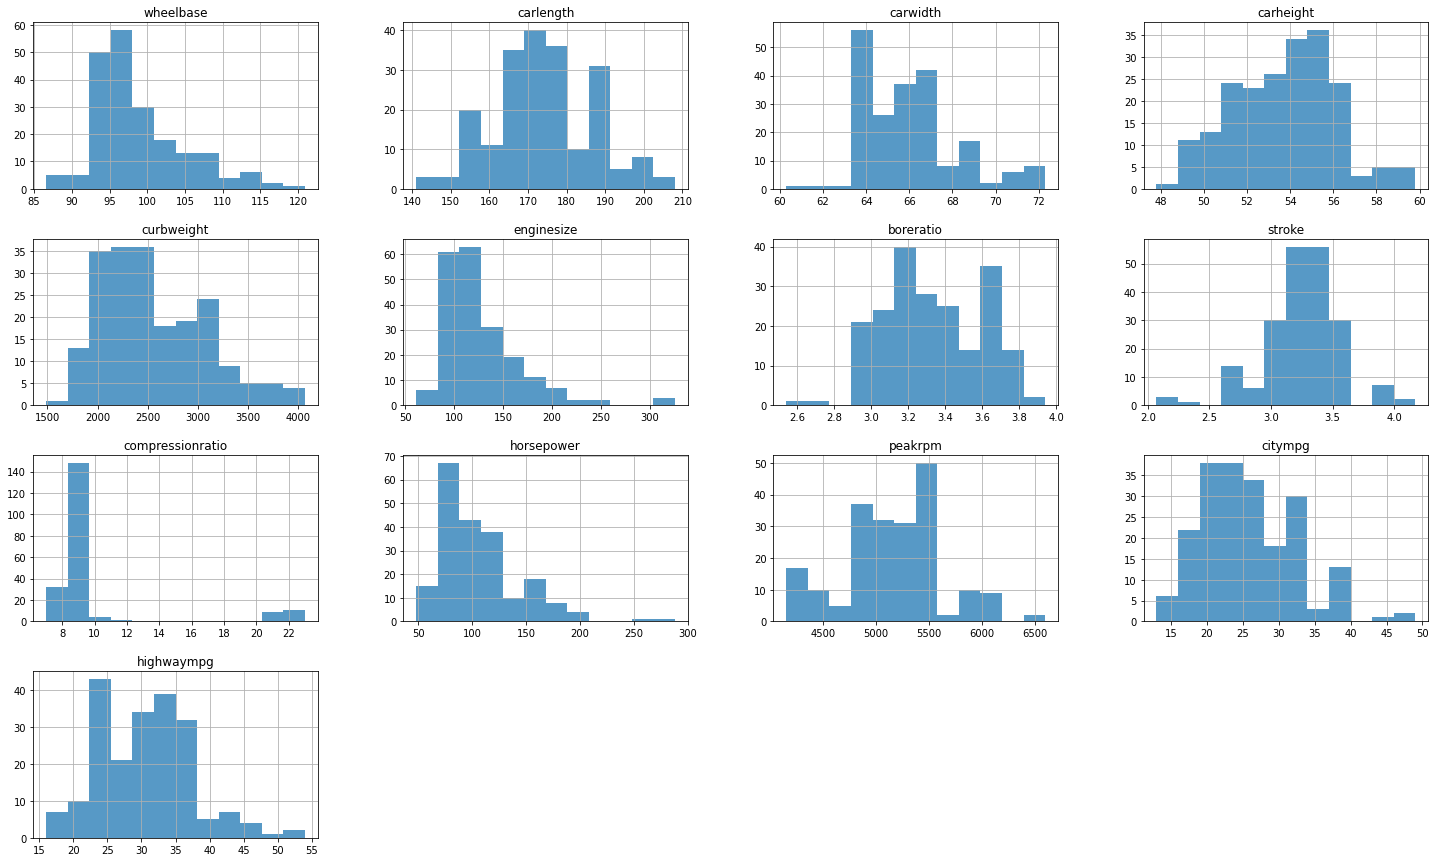

In [ ]:
#getonly fields included in model
plots = dataset[MultiVarChoices]

#Display histograms for fields in model
#Set size of histogram
f, ax = plt.subplots(1, 1, figsize = (25, 15))

#Display histograms
_ = plots.hist(bins=12, alpha=0.75, ax=ax)

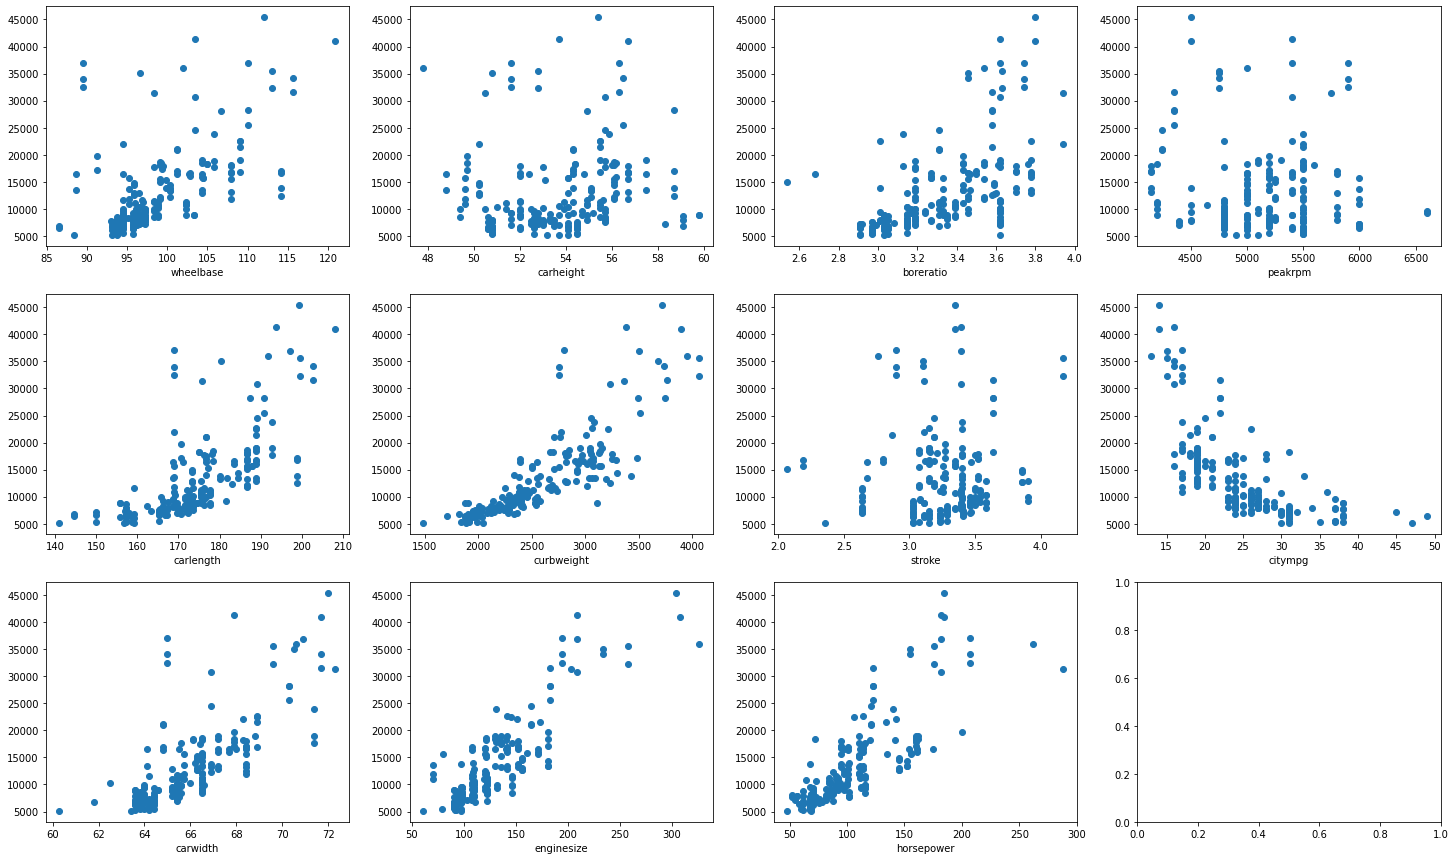

In [ ]:
#Remove compression ratio from consideration as an explanatory variables due to it's non-normal distribution
while 'compressionratio' in MultiVarChoices: MultiVarChoices.remove('compressionratio')

#Display scatterplots for remaining explanatory variables
f, ax = plt.subplots(3, 4, figsize = (25, 15))

for i in range(0, len(MultiVarChoices)-1):
  ax[i%3][int(i/3)].scatter(x = dataset[MultiVarChoices[i]], y = dataset[response])
  ax[i%3][int(i/3)].set_xlabel(MultiVarChoices[i])

plt.show()

In [ ]:
#Create Linear Regression object
model = None
model = LinearRegression()

#Check Coefficient of Determination for each variable
for i in range(0, len(MultiVarChoices)-1):
  #Fit the dataset
  pivot = np.array(datasettraining[MultiVarChoices[i]]).reshape(-1,1).tolist()
  model.fit(pivot, datasettraining[response])
  r_sq = model.score(pivot, datasettraining[response])
  print(('Coefficient of Determination for ' + MultiVarChoices[i] + ":").ljust(45), "{:.2%}".format(r_sq))

Coefficient of Determination for wheelbase:   38.06%
Coefficient of Determination for carlength:   48.56%
Coefficient of Determination for carwidth:    60.18%
Coefficient of Determination for carheight:   2.69%
Coefficient of Determination for curbweight:  70.83%
Coefficient of Determination for enginesize:  77.66%
Coefficient of Determination for boreratio:   27.02%
Coefficient of Determination for stroke:      1.84%
Coefficient of Determination for horsepower:  64.60%
Coefficient of Determination for peakrpm:     0.85%
Coefficient of Determination for citympg:     48.28%


In [ ]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor 
# Output VIF
pd.DataFrame({'variables':datasettraining[MultiVarChoices].columns[1:], 'VIF':[variance_inflation_factor(datasettraining[MultiVarChoices].values, i+1) for i in range(len(datasettraining[MultiVarChoices].columns[1:]))]})

,variables,VIF
0,carlength,1776.903126
1,carwidth,2173.425620
2,carheight,923.053894
3,curbweight,312.555997
4,enginesize,64.048853
5,boreratio,263.439941
6,stroke,131.671228
7,horsepower,64.631509
8,peakrpm,206.219848
9,citympg,386.906854


In [ ]:
#Engine Size and horsepower have the lowest VIFs, have good linear distribution in the scatterplots, and have solid coefficients of determination

#Set Variable Choices based on above criteria
MultiVarChoices = ['enginesize', 'horsepower']

#Re-do Linear Regression object
model = LinearRegression()

#Re-Fit the dataset with the smaller criteria
model.fit(datasettraining[MultiVarChoices], datasettraining[response])

#Gernate list of predictions from test data
predictions = model.predict(datasettest[MultiVarChoices])  

In [ ]:
#Sample data output
print('Actual'.ljust(14), 'Predicted'.ljust(14))
print(response.ljust(14), response.ljust(14))

for i in [0,1,2,3,4,45,46,47,48,49]:
    print(str(datasettest[response][i]).ljust(14), str(predictions[i]).ljust(14))

Actual         Predicted     
price          price         
16500.0        14023.41744919796
15250.0        14740.247574309646
16430.0        10551.696963459695
30760.0        28655.441701778458
6295.0         6303.132862428733
9980.0         10002.66476779089
13295.0        14740.247574309646
13845.0        7088.011299429234
12290.0        9879.248666279365
18420.0        17170.528037741817


In [ ]:
#Check accuracy of model (Coefficient of Determination)
r_sq = model.score(datasettraining[MultiVarChoices], datasettraining[response])
print('Coefficient of Determination:', r_sq, '\n')

#Cross validation scores
scores = cross_val_score(model, datasettraining[MultiVarChoices], datasettraining[response], cv=4)
print('Cross validation scores:', scores)

Coefficient of Determination: 0.8099577107594128 

Cross validation scores: [0.82529473 0.8633159  0.74305407 0.33423406]


In [ ]:
#Get the Y-intercept value
salIntercept = model.intercept_

#Get the Coefficents for the formula.
salCoef = model.coef_

#Output formula variables for regression analysis.
print('Intercept:', salIntercept,'\n')

print("Coefficients:")
list(zip(datasettraining[MultiVarChoices], salCoef))

Intercept: -9694.503328486326 

Coefficients:


[('enginesize', 129.75636264457475), ('horsepower', 61.70805075576187)]

In [ ]:
#Assemble fields for model
mmfields = response + ' ~ ' + ' + '.join(MultiVarChoices)

# fit multi linear regression model
multi_model = ols(mmfields, data=datasettraining).fit()

# display model summary
print(multi_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     321.8
Date:                Sun, 19 Jun 2022   Prob (F-statistic):           3.57e-55
Time:                        18:17:33   Log-Likelihood:                -1479.4
No. Observations:                 154   AIC:                             2965.
Df Residuals:                     151   BIC:                             2974.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -9694.5033    951.239    -10.191      0.0

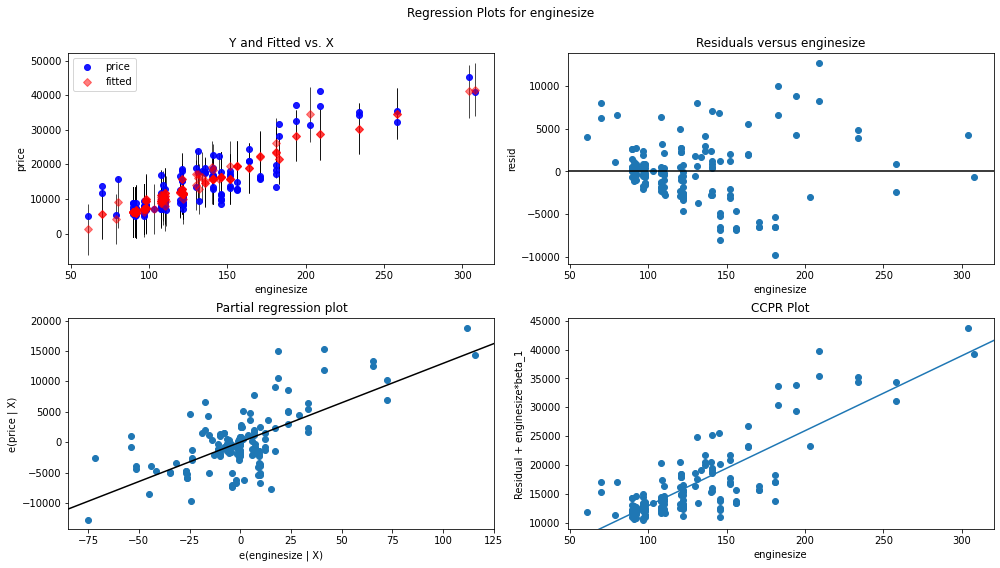

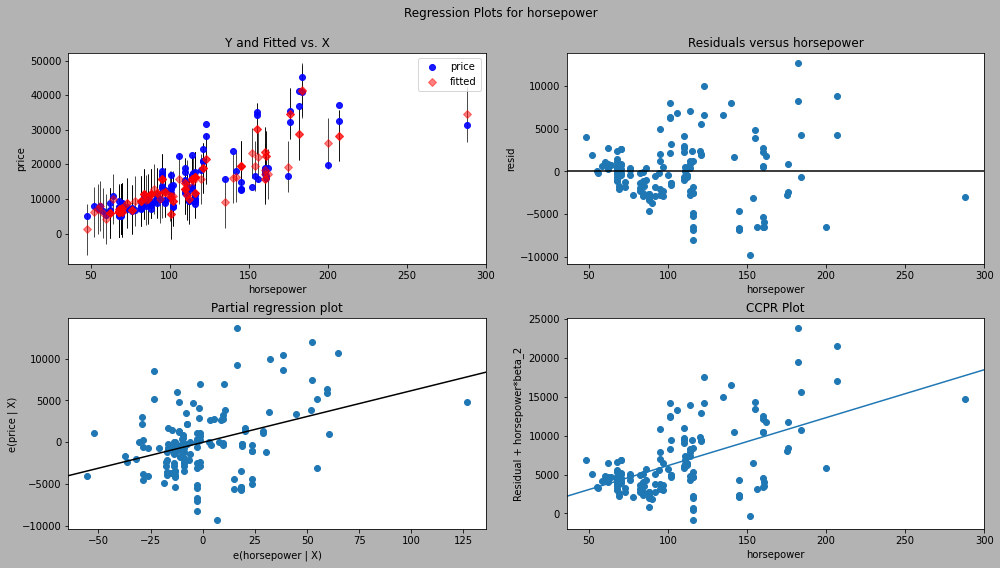

In [ ]:
#Set background color
facecolor = '0.7'
for i in range(0,len(MultiVarChoices)):
  #Alternate background color so it's easier to see separate graphs for the different residuals
  if (facecolor == '0.7'):
    facecolor = '1'
  else:
    facecolor = '0.7'
  #Fresh figure so graphs don't all stack together
  fig = None
  # modify figure size
  fig = plt.figure(figsize=(14, 8))
  fig.patch.set_facecolor(facecolor)
  #Creating regression plots
  fig = sm.graphics.plot_regress_exog(multi_model, MultiVarChoices[i],fig=fig)
  fig.show()

# **Conclusions**
We choice ***engine size*** and ***horsepower*** as the best fields for the regression model. 

We made our choice of variables in the following ways:

*   We dropped the categorical fields as overly complex to implement given the level of study for this class. We will look at them briefly later, but have no solid conclusions to offer for them.
*   We observed the histograms for the ordinal data, and found most of them displayed a normal distribution, though many were skewed right or left. Compression Ratio was very clearly not normally distributed, so it was dropped.
*   Observing the VIF scores for all the fields, we were able to elimnate the fields worst affected by multicollinearity.
*   We confirmed ***engine size*** and ***horsepower*** as good choices by checking their linearity, which looks good in the scatterplots.
*   We checked the coefficients of determination for ***engine size*** and ***horsepower*** and they have solid scores.
*   We also checked the "cross validation scores", which were resonable for this model.
*   After modelling, we observed our residuals. The points in the scatterplots are randomly distributed around 0, meaning linear regression is an appropriate model to predict our data.